## Downsample the large tif images to (512,512)

In [60]:
%matplotlib notebook

# Dependencies
import xml.etree.ElementTree as ET
import numpy as np
import glob
import cv2
import sys
import time

import colony_iomethods as cm

from matplotlib import pyplot as plt

In [96]:
# Folder for the files
exp_name = "EQ59_Single_Colony_TilesScan.lif"
acq_name = "3dTimeScan_17h_init_long"

base_folder = f"D:/Tolga/Colony Images/{exp_name}/{acq_name}/"

# Replace the metadata_path with
metadata_path = base_folder + f"MetaData/{exp_name}_{acq_name}_Properties.xml"

tree = ET.parse(metadata_path)    # xml tree of the current stage position
root = tree.getroot()           # root of the xml tree

image_xml = root[0]

# Merged images folder
merged_folder = base_folder + "Merged/"
# Downsampled images folder
downsampled_folder = base_folder + "Downsampled/"

In [97]:
merged_path = merged_folder + f"{acq_name}_t00_z000.tif"
# Image dimension description
dim_desc = cm.collectImageDim(image_xml)

img_test = cv2.imread(merged_path)
(height, width, layers) = img_test.shape

resize_dim = (512,512)
scale = resize_dim[0]/height


In [154]:
# For a set number of t
dim_desc["tsz"] = 1
# For a set number of z
dim_desc["zsz"] = 1
for tix in range(dim_desc["tsz"]):
    t_str = "t%02d" % (tix+12)
    img_zsum = np.zeros(dim_desc["zsz"])
    for zix in range(dim_desc["zsz"]):
        z_str = "z%03d" % (zix)
        merged_path = merged_folder + f"{acq_name}_{t_str}_{z_str}.tif"
        downsampled_path = downsampled_folder + f"{acq_name}_{t_str}_{z_str}.tif"
        print(f"Loading file = {merged_path}", end="\r", flush=True)
        
        img = cv2.imread(merged_path)
        while (type(img) == type(None)):
            time.sleep(1) # wait 1 sec and retry
            img = cv2.imread(merged_path)
        img_blur = cv2.GaussianBlur(img, (11,11),0)
        img_thresh = cv2.accumulate

        # Resize for video output
        img_resized = cv2.resize(img_blur, resize_dim)
        cv2.imwrite(downsampled_path, img_resized)

In [155]:
merged_path

'D:/Tolga/Colony Images/EQ59_Single_Colony_TilesScan.lif/3dTimeScan_17h_init_long/Merged/3dTimeScan_17h_init_long_t12_z040.tif'

In [185]:
merged_path = merged_folder + f"{acq_name}_{t_str}_z140.tif"
img = cv2.imread(merged_path, cv2.IMREAD_GRAYSCALE)

tilescan_desc = cm.collectTileScan(image_xml)

tile_xcnt = tilescan_desc["tile_xcnt"]
tile_ycnt = tilescan_desc["tile_ycnt"]

scalex = 1.0/tile_xcnt/2
scaley = 1.0/tile_ycnt/2

centerx_movie = 248
centery_movie = 260

centerx = int(centerx_movie/scalex)
centery = int(centery_movie/scaley)

tilescan is set


In [186]:
img

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

[ 80 106 160 255]


<IPython.core.display.Javascript object>


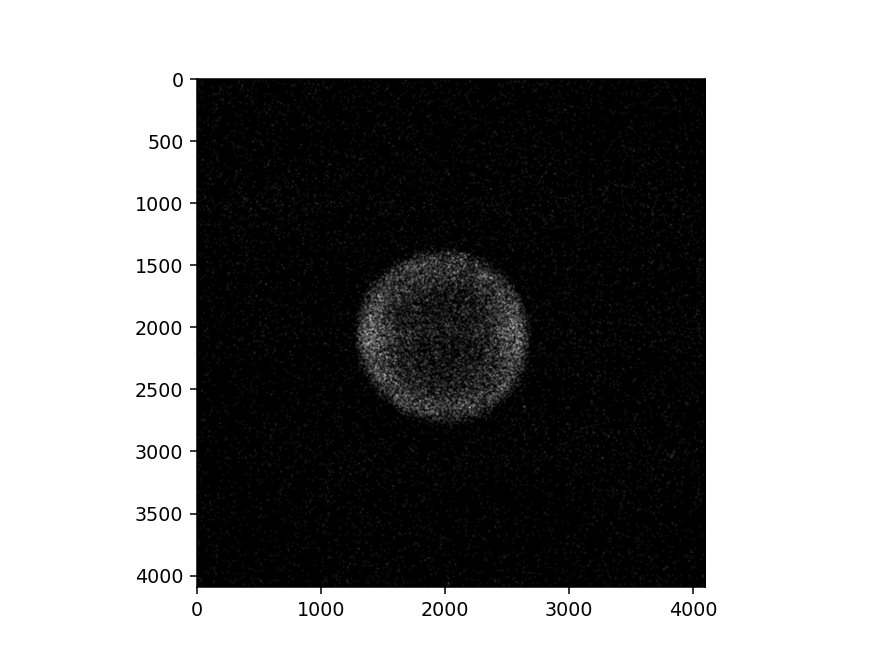

min = 0, max = 15


In [189]:
values = np.unique(img)[1:]
print(values)
nonzero_counts = np.zeros(len(values), dtype=np.uint64)
for cix in range(len(nonzero_counts)):
    nonzero_counts[cix] = img[img == values[cix]].size


_, thresh = cv2.threshold(img, values[0], 1, cv2.THRESH_BINARY)
filtered = cv2.boxFilter(thresh, -1, (15,15), normalize=False)

values = np.unique(filtered)[1:]
nonzero_counts_filter = np.zeros(len(values), dtype=np.uint8)
for cix in range(len(nonzero_counts_filter)):
    nonzero_counts_filter[cix] = filtered[filtered == values[cix]].size

# display(nonzero_counts_filter)
    
delta = 1500
shiftx = 0
fig,ax = plt.subplots()
# ax.imshow(thresh[(centery-delta):(centery+delta), (centerx-delta+shiftx):(centerx+delta+shiftx)], cmap="gray")
print("min = %d, max = %d" % (np.min(filtered), np.max(filtered)))
ax.imshow(filtered, cmap="gray")

In [148]:
filtered.shape

(4096, 4096)

<ipython-input-44-997fb0f390e9>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(111),plt.imshow(img_resized,cmap = 'gray')


(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

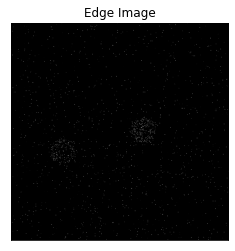

In [44]:
edges = cv2.Canny(img, 5, 20)
# plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
img_resized = cv2.resize(edges,(512,512))
plt.subplot(111),plt.imshow(img_resized,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

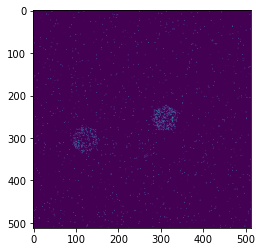

In [45]:
img2 = cv2.GaussianBlur(img, (11,11), 0)
_,img2 = cv2.threshold(img2, 5, 255, cv2.THRESH_BINARY)
img2 = cv2.resize(img2, resize_dim)
plt.imshow(img2)

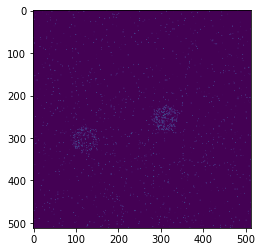

In [46]:
plt.imshow(img_resized)